# 젖소의 발정 확률(점수) 예측
- 젖소의 활동량·반추시간 이용
- 최종목표: 발정확률이 25 이상인 시간 예측

**주요 실습**

- 데이터셋 구축
  - 데이터 로드
  - PANDAS로 시트 파일 읽기
  - 데이터 전처리(필요한 데이터만 정제하고 하나의 데이터 파일로 정리하기)
- 모델 학습
  - Linear regression, Logistic regression 등의 회귀 모델
  - Sikcit learn 라이브러리의 머신러닝 모듈 활용



***이 실습에서 GPU는 사용되지 않습니다. 표준 런타임으로 진행해도 됩니다.***

## **01. 데이터 로드**

모델 학습에 이용할 데이터셋을 불러옵니다.
세션에는 데이터가 저장되지 않기 때문에 세션에 업로드해주거나 구글 드라이브에서 불러옵니다.

파일 크기가 100MB 이상이면 업로드 시간이 오래걸리고, 세션에는 데이터가 저장되지 않으니 구글 드라이브를 추천합니다.

구글 드라이브에 업로드할 때는 압축을 해제한 상태로 폴더 째로 업로드해주세요

### 세션 업로드

In [1]:
from google.colab import files
uploaded = files.upload()  # 데이터 파일 업로드

Saving cow_csv.zip to cow_csv.zip


In [2]:
!unzip -q cow_csv.zip # 압축파일 이름 확인

### 구글드라이브 연동

(1) 구글 드라이브 마운트

In [ ]:
# 라이브러리 import
from google.colab import drive
# 구글 드라이브 마운트
drive.mount('./gdrive')

Mounted at ./gdrive


(2) 작업 공간으로 이동

- 작업의 편의성을 위해 데이터가 저장된 경로 가까이로 이동해서 작업합니다.
- 이 코드는 데이터 디렉토리의 상위폴더를 기준으로 작성되었습니다.

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/rda-colab/') # 데이터 폴더를 업로드한 경로를 입력해주세요.
!pwd

/content/gdrive/MyDrive/rda-colab


In [ ]:
!ls # 데이터 폴더 이름이 출력되어야 합니다.

 preprocessed_data.csv	'데이터 설명.pdf'   양돈과_최요한
 낙농과_박성민		 양돈과_백수현	    한우연_박명선_대사각인1차.xlsx


## **02. 데이터 전처리**

`pandas` 라이브러리는 csv, xlsx 등 스프레드시트 데이터를 처리해주는 라이브러리입니다.

`pandas`를 이용해서 데이터를 전처리하겠습니다.

### 데이터 확인하기

데이터 전처리를 하기 전에, 데이터를 들여다보겠습니다.

```import pandas as pd```로 `pandas` 라이브러리를 불러와줍니다.

`as pd`는 `pandas` 라이브러리를 `pd`라는 이름으로 호출하겠다는 의미입니다.


In [3]:
# 라이브러리
import pandas as pd

`read_csv()` 함수로 엑셀 파일을 하나 불러와줍니다.

In [4]:
!ls cow

'월별 lely 활동량 (24.01).csv'	'월별 lely 활동량 (24.07).csv'
'월별 lely 활동량 (24.02).csv'	'월별 lely 활동량 (24.08).csv'
'월별 lely 활동량 (24.03).csv'	'월별 lely 활동량 (24.09).csv'
'월별 lely 활동량 (24.04).csv'	'월별 lely 활동량 (24.10).csv'
'월별 lely 활동량 (24.05).csv'	'월별 lely 활동량 (24.11).csv'
'월별 lely 활동량 (24.06).csv'	'월별 lely 활동량 (24.12)~12.22.csv'


In [7]:
sample_data = pd.read_csv('./cow/월별 lely 활동량 (24.01).csv')
sample_data.head(5) # 상위 5개 행을 확인하는 함수

,LELY 착유,개체 번호,개체명,날짜,시간(시:분),활동량,전체 반추 시간(분),발정 확률 주의정보 임계값,발정 가능성 주의,발정 확률,활동량 평균,반추 활동,일일 유량,일일 평균 유량,착유일수
0,A3,59,15063,2024-01-01,00:00:00,39.0,392.0,25.0,NaN,-6.0,NaN,NaN,27.0,26.0,312.0
1,A3,37,18016,2024-01-01,00:00:00,31.0,450.0,25.0,NaN,-6.0,NaN,NaN,39.0,36.0,179.0
2,A3,140,19025,2024-01-01,00:00:00,52.0,562.0,25.0,NaN,-7.0,NaN,NaN,29.0,30.0,197.0
3,A3,149,20006,2024-01-01,00:00:00,35.0,481.0,25.0,NaN,-9.0,NaN,NaN,30.0,28.0,175.0
4,A3,4,20020,2024-01-01,00:00:00,41.0,462.0,25.0,NaN,-3.0,NaN,NaN,29.0,26.0,214.0


위 코드가 잘 실행되었다면 다음과 같은 표가 출력되어야 합니다.

|index|LELY 착유|개체 번호|개체명|날짜|시간\(시:분\)|활동량|전체 반추 시간\(분\)|발정 확률 주의정보 임계값|발정 가능성 주의|발정 확률|활동량 평균|반추 활동|일일 유량|일일 평균 유량|착유일수|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|A3|59|15063|2024-01-01 00:00:00|00:00:00|39\.0|392\.0|25\.0|NaN|-6\.0|NaN|NaN|27\.0|26\.0|312\.0|
|1|A3|37|18016|2024-01-01 00:00:00|00:00:00|31\.0|450\.0|25\.0|NaN|-6\.0|NaN|NaN|39\.0|36\.0|179\.0|
|2|A3|140|19025|2024-01-01 00:00:00|00:00:00|52\.0|562\.0|25\.0|NaN|-7\.0|NaN|NaN|29\.0|30\.0|197\.0|
|3|A3|149|20006|2024-01-01 00:00:00|00:00:00|35\.0|481\.0|25\.0|NaN|-9\.0|NaN|NaN|30\.0|28\.0|175\.0|
|4|A3|4|20020|2024-01-01 00:00:00|00:00:00|41\.0|462\.0|25\.0|NaN|-3\.0|NaN|NaN|29\.0|26\.0|214\.0|



여기서 실험의 입력인 활동량과 반추시간과 출력인 발정 확률을 선택해봅시다.

In [8]:
cols = ['활동량', '전체 반추 시간(분)', '발정 확률']
sample_data = sample_data[cols]
sample_data.head()

,활동량,전체 반추 시간(분),발정 확률
0,39.0,392.0,-6.0
1,31.0,450.0,-6.0
2,52.0,562.0,-7.0
3,35.0,481.0,-9.0
4,41.0,462.0,-3.0


다음 표처럼 선택한 열만 출력되었다면 성공입니다.

|index|활동량|전체 반추 시간\(분\)|발정 확률|
|---|---|---|---|
|0|30\.0|465\.0|2\.0|
|1|39\.0|587\.0|-2\.0|
|2|40\.0|522\.0|-6\.0|
|3|41\.0|533\.0|-7\.0|
|4|38\.0|438\.0|4\.0|

### 데이터 전처리

이제, 모든 데이터를 불러와서 위처럼 필요한 항목만 선택하겠습니다.

먼저 `glob` 라이브러리로 여러 csv 파일 목록을 찾아봅시다.

In [12]:
# 라이브러리
import glob

# 파일 경로 리스트
path = './cow'
file_list = glob.glob(path + '/*.csv')
file_list.sort() # 리스트를 정렬합니다.
print(len(xfile_list)) # 12
print(xfile_list) # 출력: ['./cow/월별 lely 활동량 (24.01).csv', './cow/월별 lely 활동량 (24.02).csv', './cow/월별 lely 활동량 (24.03).csv', './cow/월별 lely 활동량 (24.04).csv', './cow/월별 lely 활동량 (24.05).csv', './cow/월별 lely 활동량 (24.06).csv', './cow/월별 lely 활동량 (24.07).csv', './cow/월별 lely 활동량 (24.08).csv', './cow/월별 lely 활동량 (24.09).csv', './cow/월별 lely 활동량 (24.10).csv', './cow/월별 lely 활동량 (24.11).csv', './cow/월별 lely 활동량 (24.12)~12.22.csv']

12
['./cow/월별 lely 활동량 (24.01).csv', './cow/월별 lely 활동량 (24.02).csv', './cow/월별 lely 활동량 (24.03).csv', './cow/월별 lely 활동량 (24.04).csv', './cow/월별 lely 활동량 (24.05).csv', './cow/월별 lely 활동량 (24.06).csv', './cow/월별 lely 활동량 (24.07).csv', './cow/월별 lely 활동량 (24.08).csv', './cow/월별 lely 활동량 (24.09).csv', './cow/월별 lely 활동량 (24.10).csv', './cow/월별 lely 활동량 (24.11).csv', './cow/월별 lely 활동량 (24.12)~12.22.csv']


xlsx 파일은 처리가 느리기 때문에 csv 파일을 사용하는게 좋습니다.

작업이 오래 걸리기 때문에 (약 15분 내외) 미리 변환하여 업로드해두어도 좋습니다.

csv 목록을 확인합니다.

In [13]:
sample_data = pd.read_csv(file_list[0])
sample_data.head()

,LELY 착유,개체 번호,개체명,날짜,시간(시:분),활동량,전체 반추 시간(분),발정 확률 주의정보 임계값,발정 가능성 주의,발정 확률,활동량 평균,반추 활동,일일 유량,일일 평균 유량,착유일수
0,A3,59,15063,2024-01-01,00:00:00,39.0,392.0,25.0,NaN,-6.0,NaN,NaN,27.0,26.0,312.0
1,A3,37,18016,2024-01-01,00:00:00,31.0,450.0,25.0,NaN,-6.0,NaN,NaN,39.0,36.0,179.0
2,A3,140,19025,2024-01-01,00:00:00,52.0,562.0,25.0,NaN,-7.0,NaN,NaN,29.0,30.0,197.0
3,A3,149,20006,2024-01-01,00:00:00,35.0,481.0,25.0,NaN,-9.0,NaN,NaN,30.0,28.0,175.0
4,A3,4,20020,2024-01-01,00:00:00,41.0,462.0,25.0,NaN,-3.0,NaN,NaN,29.0,26.0,214.0


모든 데이터 파일을 불러와서 각 파일의 *활동량, 전체 반추 시간(분), 발정 확률*을 하나로 합쳐줍니다.

In [27]:
tmp = [] # 데이터를 임시저장할  빈 리스트

for filename in file_list:
    try:


        df = pd.read_csv(filename, dtype={'개체명': 'string'}, low_memory=False)
        selected_cols = ['활동량', '전체 반추 시간(분)', '발정 확률']
        df = df[selected_cols]

        # # 월 정보 저장 - 월 데이터를 활용하려면 활성화해주세요
        # month = filename[36:38]  # 파일명에서 월 정보를 추출합니다.
        # df['월'] = int(month)

        # 결측값 제거
        df = df.apply(pd.to_numeric, errors='coerce')

        df = df.dropna(axis=0)

        tmp.append(df)
    except Exception as e:
        print(f"{filename} 처리 중 오류 발생:", e)

print(len(tmp)) # 출력: 12
print(tmp[0])

# 임시 저장한 데이터를 하나의 pandas 객체로 병합
all_data = pd.concat(tmp, ignore_index=True)

12
         활동량  전체 반추 시간(분)  발정 확률
0       39.0        392.0   -6.0
1       31.0        450.0   -6.0
2       52.0        562.0   -7.0
3       35.0        481.0   -9.0
4       41.0        462.0   -3.0
...      ...          ...    ...
115047  34.0        568.0    3.0
115048  41.0        452.0   -1.0
115053  76.0        340.0    2.0
115062  30.0        299.0   -3.0
115066  63.0        324.0    3.0

[50112 rows x 3 columns]


병합한 데이터를 확인합니다.

In [22]:
all_data.head()

,활동량,전체 반추 시간(분),발정 확률
0,39.0,392.0,-6.0
1,31.0,450.0,-6.0
2,52.0,562.0,-7.0
3,35.0,481.0,-9.0
4,41.0,462.0,-3.0


In [23]:
print(all_data.shape) # 출력: (504678, 3)

(504678, 3)


**전처리가 완료되었습니다.**

우리는 이제 (472527, 3) 크기의 큰 데이터를 가졌습니다.
(월 정보를 추가한 경우 (472527, 4))

전처리된 데이터를 별도로 저장하고 싶다면

In [29]:
import os
all_data.to_csv('preprocessed_data.csv', index=False)
print(os.path.exists('preprocessed_data.csv')) # 경로 존재유무 확인, 출력: True

True


## **03. 모델 학습**

본격적으로 회귀모델을 학습해봅시다.

다음 라이브러리를 사용합니다.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 데이터셋

위에서 전처리한 데이터를 학습 셋과 검증 셋으로 나눠줍니다.

In [31]:
X = all_data[['활동량', '전체 반추 시간(분)']]
y = all_data['발정 확률']

In [32]:
print(X)

         활동량  전체 반추 시간(분)
0       39.0        392.0
1       31.0        450.0
2       52.0        562.0
3       35.0        481.0
4       41.0        462.0
...      ...          ...
504673  49.0        391.0
504674  61.0        402.0
504675  56.0        412.0
504676  52.0        419.0
504677  49.0        440.0

[504678 rows x 2 columns]


In [33]:
print(y)

0        -6.0
1        -6.0
2        -7.0
3        -9.0
4        -3.0
         ... 
504673   -7.0
504674   -7.0
504675   -6.0
504676   -4.0
504677   -1.0
Name: 발정 확률, Length: 504678, dtype: float64


학습 8 : 2 검증 비율로 나눠줍니다.

`scikit-learn` 라이브러리의 [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
 함수를 이용합니다.

- test_size: *float or int*, 테스트 셋 비율
- shuffle: *bool*, 셔플 사용 여부, 편중을 막기 위해 True를 추천.

(함수이름을 클릭하면 문서 페이지로 이동합니다.)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [35]:
X_train

,활동량,전체 반추 시간(분)
240432,44.0,511.0
332769,73.0,433.0
122999,95.0,439.0
422093,27.0,628.0
465526,27.0,478.0
...,...,...
433056,50.0,490.0
44497,44.0,434.0
311014,49.0,271.0
147179,62.0,482.0


In [36]:
y_train

,발정 확률
240432,7.0
332769,-18.0
122999,4.0
422093,-8.0
465526,-4.0
...,...
433056,-10.0
44497,-4.0
311014,-5.0
147179,12.0


### 모델 학습

이제 모든 준비가 끝났습니다.

모델을 학습해봅시다.

여기서는 scikit-learn에서 제공하는 linear regression 모델을 사용합니다.

In [37]:
# 모델 선택
model = LinearRegression()
# 학습
model.fit(X_train, y_train)

LinearRegression()

놀랍도록 간단하게 모델 학습이 끝났습니다.

이제 결과를 확인해봅시다.

In [38]:
# 결과 예측
y_pred = model.predict(X_test)

In [39]:
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 109.7234
R² Score: 0.0682


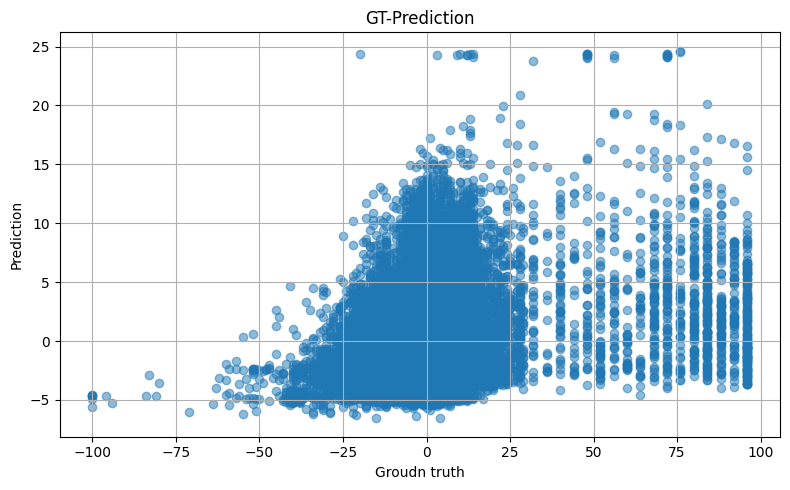

In [40]:
# 정답-예측 그래프

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Groudn truth') # 한글은 깨질 수 있습니다.
plt.ylabel('Prediction')
plt.title('GT-Prediction')
plt.grid(True)
plt.tight_layout()
plt.show()

***맙소사***  끔찍한 결과가 나왔습니다.


회귀 모델이 거의 의미 없는 수준입니다.

원인을 추론해보면,


1. 입력 변수와 목표값의 관계가 약함
- 활동량, 반추시간만으로는 발정을 예측하기에 정보가 부족할 수 있음
- 다른 중요한 특징의 추가가 필요할 수 있음

2. 데이터 품질 문제
- 데이터 자체가 부정확하거나 노이즈가 많을 가능성
- 결측치/이상치의 영향

3. 데이터 분포 불균형
- 발정 점수가 대부분 특정 범위에 몰려있거나, 이상치가 있을 경우 모델이 평균만 예측하게 됨

4. 모델 한계
- LinearRegression은 선형 관계만 학습 가능 → 비선형이라면 적합하지 않음



## **A1. 데이터 분포 확인**


다양한 원인이 있겠지만 가장 접근하기 쉬운 데이터 분포부터 살펴보겠습니다.

### 히스토그램 생성

In [41]:
print(all_data['발정 확률'].min(), all_data['발정 확률'].max())

-100.0 96.0


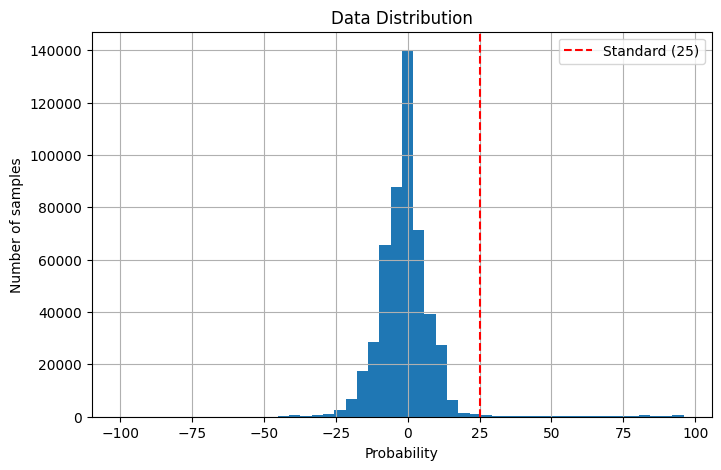

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(all_data['발정 확률'], bins=50) # bins: 히스토그램 기둥 수
plt.axvline(25, color='red', linestyle='--', label='Standard (25)') # 기준 표시
plt.title('Data Distribution')
plt.xlabel('Probability')
plt.ylabel('Number of samples')
plt.legend()
plt.grid(True)
plt.show()

히스토그램을 통해 데이터의 분포를 살펴보고 특정한 값에 데이터가 몰려있는 것을 확인할 수 있습니다.

특히, 최종목표인 발정 확률이 25 이상인 구간의 데이터가 부족합니다.

### 입력 변수와 목표 값의 상관관계

In [ ]:
!apt-get -qq -y install fonts-nanum

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


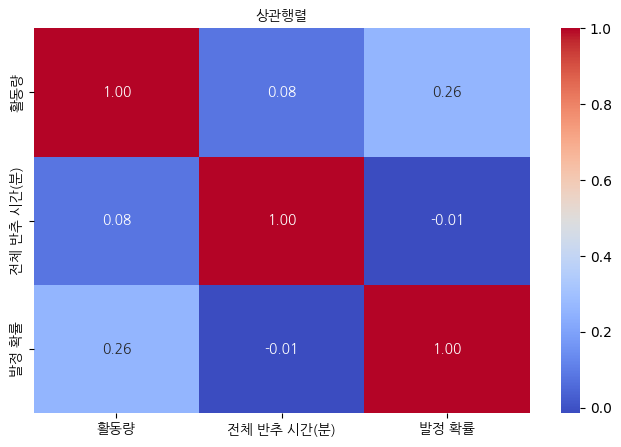

In [46]:
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'fontproperties': fontprop})
plt.title("상관행렬", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.show()

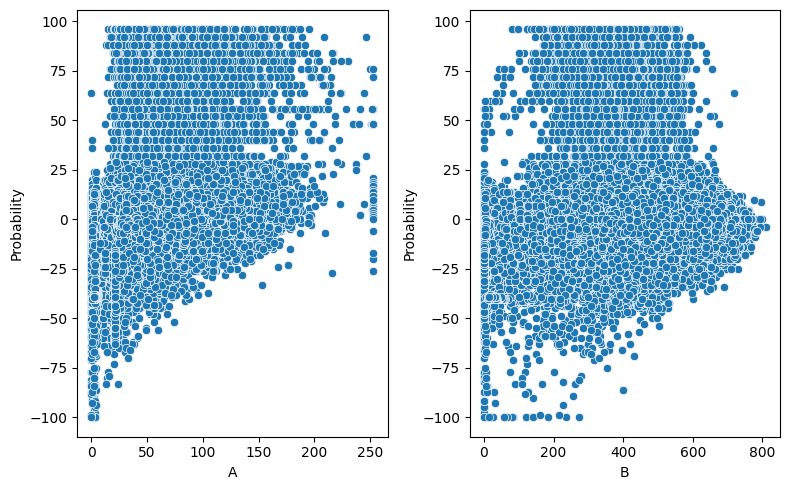

In [47]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='활동량', y='발정 확률', data=all_data)
plt.xlabel('A')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
sns.scatterplot(x='전체 반추 시간(분)', y='발정 확률', data=all_data)
plt.xlabel('B')
plt.ylabel('Probability')

plt.tight_layout()

plt.show()

다른 항목과 발정 확률의 상관관계를 계산한 결과:

| 항목          | 발정 확률과의 상관계수               |
| ----------- | -------------------------- |
| **활동량**     | **0.26** |
| 비유일수        | 0.03                       |
| 일일 유량       | 0.01                       |
| 착유일수        | 0.01                       |
| 전체 반추 시간(분) | **-0.01** |
| 나머지 항목들     | 0에 근사           |


# 발정 확률 분류



logistic regression

- 입력(Features): 활동량, 반추시간, 착유일수 등

- 출력(Target):

  `1` → 발정 확률 ≥ 25

  `0` → 발정 확률 < 25

## 데이터 전처리

In [49]:
all_data['Label'] = (all_data['발정 확률'] >= 25).astype(int)
print(all_data['Label'].value_counts())

Label
0    498742
1      5936
Name: count, dtype: int64


In [50]:
all_data.head()

,활동량,전체 반추 시간(분),발정 확률,Label
0,39.0,392.0,-6.0,0
1,31.0,450.0,-6.0,0
2,52.0,562.0,-7.0,0
3,35.0,481.0,-9.0,0
4,41.0,462.0,-3.0,0


## 모델 학습

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


 Classification Report:
              precision    recall  f1-score   support

           0      0.989     1.000     0.994     99764
           1      0.500     0.026     0.050      1172

    accuracy                          0.988    100936
   macro avg      0.744     0.513     0.522    100936
weighted avg      0.983     0.988     0.983    100936



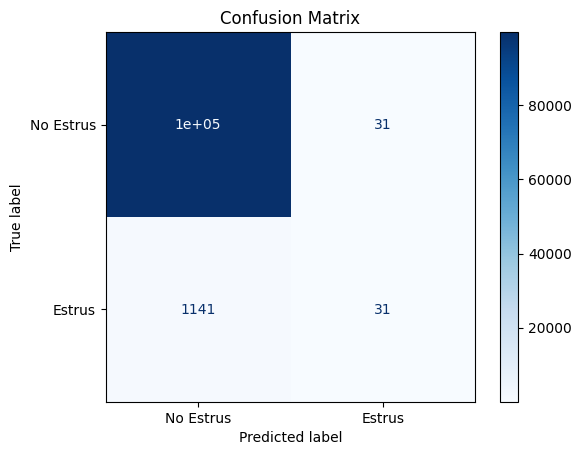

In [63]:
X = all_data[['활동량', '전체 반추 시간(분)']]
y = all_data['Label']

# 학습/테스트 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 학습
model = LogisticRegression()
# model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

print(" Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Estrus", "Estrus"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

전체 정확도 (Accuracy): 98.9% → 대부분이 0이기 때문에 생긴 착시

문제점:

1 (발정)의 Recall이 0.040로 매우 낮음 → 거의 못 맞춤

발정인 데이터를 거의 다 0으로 예측하고 있음

## 데이터 밸런스 조정

In [53]:
# 모델 학습 (클래스 불균형 보정)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

 Classification Report:
              precision    recall  f1-score   support

           0      0.995     0.773     0.870     99773
           1      0.033     0.676     0.064      1163

    accuracy                          0.771    100936
   macro avg      0.514     0.724     0.467    100936
weighted avg      0.984     0.771     0.861    100936



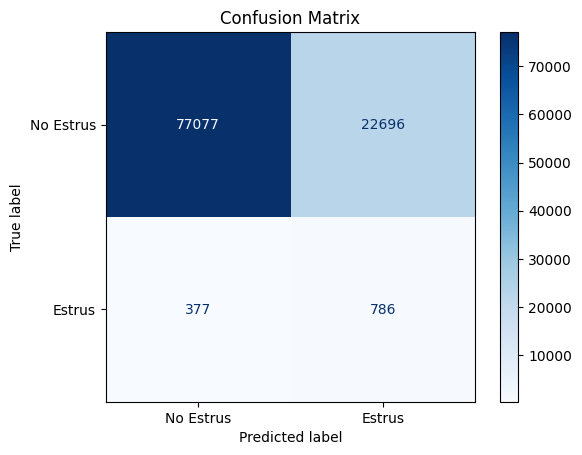

In [54]:
# 예측
y_pred = model.predict(X_test)

print(" Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Estrus", "Estrus"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 언더샘플링

In [55]:
# 클래스별 분리
X_class0 = X[y == 0]
X_class1 = X[y == 1]

y_class0 = y[y == 0]
y_class1 = y[y == 1]

# 언더샘플링: 클래스 1 개수에 맞춰 클래스 0 샘플링
X_class0_sampled, _, y_class0_sampled, _ = train_test_split(
    X_class0, y_class0, train_size=len(y_class1), random_state=42, shuffle=True
)

# 두 클래스 합치기
X_balanced = pd.concat([X_class0_sampled, X_class1])
y_balanced = pd.concat([y_class0_sampled, y_class1])

# 최종 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, shuffle=True
)

 Classification Report:
              precision    recall  f1-score   support

           0      0.726     0.778     0.751      1212
           1      0.750     0.694     0.721      1163

    accuracy                          0.737      2375
   macro avg      0.738     0.736     0.736      2375
weighted avg      0.738     0.737     0.736      2375



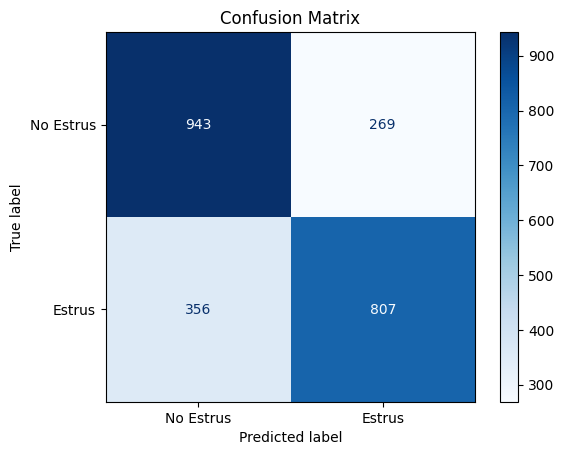

In [56]:
# 모델 학습
# model = LogisticRegression()
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

print(" Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Estrus", "Estrus"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

모델 성능 평가 시에는 반드시 원래 분포를 반영한 테스트 세트를 따로 써야함

## MLP

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
# 데이터셋 다시
(1) 기존 분포
(2) 언더샘플링

In [64]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 텐서 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [65]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [66]:
epochs = 200
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

print(f"최종 학습 손실: {losses[-1]:.4f}")


최종 학습 손실: 0.0531


[[99764     0]
 [ 1172     0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     99764
         1.0       0.00      0.00      0.00      1172

    accuracy                           0.99    100936
   macro avg       0.49      0.50      0.50    100936
weighted avg       0.98      0.99      0.98    100936



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


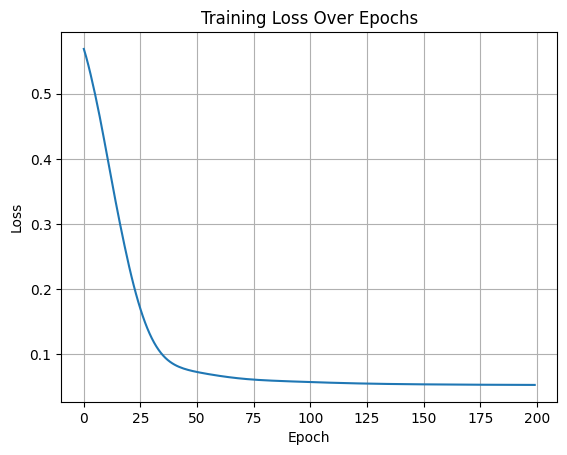

In [67]:
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    preds_class = (preds >= 0.5).int()

print(confusion_matrix(y_test_tensor, preds_class))
print(classification_report(y_test_tensor, preds_class))

plt.plot(losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

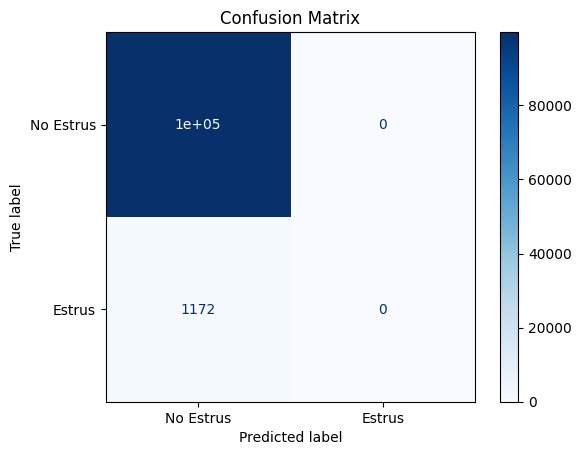

In [68]:
cm = confusion_matrix(y_test_tensor, preds_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Estrus", "Estrus"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()